In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ffmpeg

In [4]:
def main():
    #simulation parameters
    Nx = 400
    Ny = 100
    rho0 = 100
    tau = 0.6
    Nt = 40
    
    plotRealTime = False
    animate = True
    images = []
    
    #lattice speeds/weights for D2Q9
    NL = 9
    idxs = np.arange(NL)
    cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
    cys = np.array([0,1,1,0,-1,-1,-1,0,1])
    weights = np.array([4/9.0,1/9.0,1/36.0,1/9.0,1/36.0,1/9.0,1/36.0,1/9.0,1/36.0])
    
    #ICs
    F = np.ones((Ny,Nx,NL))
    np.random.seed(42)
    F += 0.01*np.random.randn(Ny,Nx,NL)
    X,Y = np.meshgrid(range(Nx),range(Ny))
    F[:,:,3] += 2*(1+0.2*np.cos(2*np.pi*X/Ny*4))
    rho = np.sum(F,2)
    for i in idxs:
        F[:,:,i] *= rho0/rho
        
    #cylinder boundary
    X,Y = np.meshgrid(range(Nx),range(Ny))
    cylinder = (X-Nx/4.0)**2 + (Y-Ny/2.0)**2 < (Ny/4.0)**2
            
    #prep figure
    fig, ax = plt.subplots()
    #fig = plt.figure(figsize=(4,2),dpi=80)
    
    #simulation main loop
    for it in range(Nt):
        
        #drift
        for i,cx,cy in zip(idxs,cxs,cys):
            F[:,:,i] = np.roll(F[:,:,i],cx,axis=1)
            F[:,:,i] = np.roll(F[:,:,i],cy,axis=0)
            
        #reflective boundaries
        bndryF = F[cylinder,:]
        bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
        
        #calculate fuild variables
        rho = np.sum(F,2)
        ux = np.sum(F*cxs,2)/rho
        uy = np.sum(F*cys,2)/rho
        
        #apply collision
        F_eq = np.zeros(F.shape)
        for i, cx, cy, w in zip(idxs,cxs,cys,weights):
            F_eq[:,:,i] = rho*w*(1+3*(cx*ux+cy*uy)+9*(cx*ux+cy*uy)**2/2.0-3*(ux**2+uy**2)/2.0)
            
        F += -(1.0/tau)*(F-F_eq)
        F[cylinder,:] = bndryF
        
        if ((plotRealTime and (it % 10) == 0) or (it == Nt-1)) and not animate:
            plt.cla()
            ux[cylinder] = 0
            uy[cylinder] = 0
            vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
            vorticity[cylinder] = np.nan
            vorticity = np.ma.array(vorticity, mask=cylinder)
            plt.imshow(vorticity, cmap='bwr')
            plt.imshow(~cylinder, cmap='gray', alpha=0.3)
            plt.clim(-.1, .1)
            ax = plt.gca()
            ax.invert_yaxis()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_aspect('equal')
            plt.pause(0.001)
            
        if ((animate and (it%10)==0) or (it == Nt-1)) and not plotRealTime:
            ux[cylinder] = 0
            uy[cylinder] = 0
            vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
            vorticity[cylinder] = np.nan
            vorticity = np.ma.array(vorticity, mask=cylinder)
            im = ax.imshow(vorticity, animated = True,cmap='bwr')
            images.append([im])
    
    #if animate:
    #    ani = animation.ArtistAnimation(fig,images,interval=50,blit=True,repeat_delay=1000)
    #    writervideo = animation.FFMpegWriter(fps=60)
    #    ani.save('test.mov',writer=writervideo)
    
    
    plt.show()
        
    

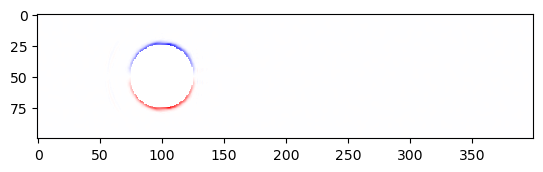

In [5]:
main()

In [25]:
def main2():
    #simulation parameters
    Nx = 400
    Ny = 100
    rho0 = 100
    tau = 0.6
    Nt = 4000
    
    plotRealTime = False
    animate = True
    images = []
    
    #lattice speeds/weights for D2Q9
    NL = 9
    idxs = np.arange(NL)
    cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
    cys = np.array([0,1,1,0,-1,-1,-1,0,1])
    weights = np.array([4/9.0,1/9.0,1/36.0,1/9.0,1/36.0,1/9.0,1/36.0,1/9.0,1/36.0])
    
    #ICs
    F = np.ones((Ny,Nx,NL))
    np.random.seed(42)
    F += 0.01*np.random.randn(Ny,Nx,NL)
    X,Y = np.meshgrid(range(Nx),range(Ny))
    F[:,:,3] += 2*(1+0.2*np.cos(2*np.pi*X/Ny*4))
    rho = np.sum(F,2)
    for i in idxs:
        F[:,:,i] *= rho0/rho
        
    #cylinder boundary
    X,Y = np.meshgrid(range(Nx),range(Ny))
    array1 = ((X-Nx/4.0)**2 + (Y-Ny/2.0)**2 < (Ny/4.0)**2)
    
    cylinder = array1
            
    #prep figure
    fig, ax = plt.subplots()
    #fig = plt.figure(figsize=(4,2),dpi=80)
    
    #simulation main loop
    for it in range(Nt):
        
        #drift
        for i,cx,cy in zip(idxs,cxs,cys):
            F[:,:,i] = np.roll(F[:,:,i],cx,axis=1)
            F[:,:,i] = np.roll(F[:,:,i],cy,axis=0)
            
        #reflective boundaries
        bndryF = F[cylinder,:]
        bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
        
        #calculate fuild variables
        rho = np.sum(F,2)
        ux = np.sum(F*cxs,2)/rho
        uy = np.sum(F*cys,2)/rho
        
        #apply collision
        F_eq = np.zeros(F.shape)
        for i, cx, cy, w in zip(idxs,cxs,cys,weights):
            F_eq[:,:,i] = rho*w*(1+3*(cx*ux+cy*uy)+9*(cx*ux+cy*uy)**2/2.0-3*(ux**2+uy**2)/2.0)
            
        F += -(1.0/tau)*(F-F_eq)
        F[cylinder,:] = bndryF
        
        if ((plotRealTime and (it % 10) == 0) or (it == Nt-1)) and not animate:
            plt.cla()
            ux[cylinder] = 0
            uy[cylinder] = 0
            vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
            vorticity[cylinder] = np.nan
            vorticity = np.ma.array(vorticity, mask=cylinder)
            plt.imshow(vorticity, cmap='bwr')
            plt.imshow(~cylinder, cmap='gray', alpha=0.3)
            plt.clim(-.1, .1)
            ax = plt.gca()
            ax.invert_yaxis()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_aspect('equal')
            plt.pause(0.001)
            
        if ((animate and (it%10)==0) or (it == Nt-1)) and not plotRealTime:
            ux[cylinder] = 0
            uy[cylinder] = 0
            vorticity = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) - (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1))
            vorticity[cylinder] = np.nan
            vorticity = np.ma.array(vorticity, mask=cylinder)
            im = ax.imshow(vorticity, animated = True,cmap='bwr')
            images.append([im])
    
    if animate:
        ani = animation.ArtistAnimation(fig,images,interval=50,blit=True,repeat_delay=1000)
        writervideo = animation.FFMpegWriter(fps=60)
        ani.save('test.mov',writer=writervideo)
    
    
    plt.show()
        
 

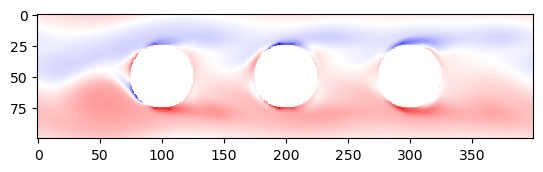

In [26]:
main2()